In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

C:\Users\ebish\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


<h2>Define Hyper-parameters</h2>

In [77]:
#define number of training iterations
NUM_ITER = 10000
#define learning rate
lr = .1

<h2>Define your input data and expected labels</h2>

In [78]:
#define the training input data
x = np.array([[0,0],[1,0],[1,1],[0,1]],np.float32)
#define the target outputs/labels for AND gate
y = np.array([0,1,0,1],np.float32) #(for XOR gate)
#y=np.array([0,0,1,0],np.float32) (for AND gate)
#y = np.array([0,1,1,1],np.float32)       (uncomment this line if you are doing OR gate)
y = np.reshape(y,[4,1])

<h2>Define placeholder and Variables</h2>

In [79]:
#rest the graph
tf.reset_default_graph()
#define the placeholder to feed the training data later
X = tf.placeholder(tf.float32,shape=[4,2],name='X')
Y = tf.placeholder(tf.float32,shape=[4,1],name='Y')

#define the weights and initialize with random normal distribution
#we need weights and biases for the hidden layer and the ouput layer
W=tf.Variable(tf.random_normal([2,2]),tf.float32,name='W')
W2=tf.Variable(tf.random_normal([2,1]),tf.float32,name='W2')
#define the bias with zero initialization
b=tf.Variable(tf.zeros([2]),tf.float32,name='b')
b2=tf.Variable(tf.zeros([1]),tf.float32,name='b2')

<h2>Define the neural network</h2>

In [80]:
hidden_layer=tf.sigmoid(tf.add(tf.matmul(X,W),b))
Y_hat=tf.add(tf.matmul(hidden_layer,W2),b2)


<h2>Define cost function</h2>

In [81]:
#sigmoid_cross_entropy takes sigmoid for the output so no need to put it above
cost=tf.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(logits=Y_hat, labels=Y))
opt=tf.train.GradientDescentOptimizer(learning_rate=lr)
opt=opt.minimize(cost)


<h2>Execute training</h2>

In [82]:
#initialize tensorflow variables
init = tf.global_variables_initializer()

#start tensorflow session
with tf.Session() as sess:
    #run initialization
    sess.run(init)
    #training for number of iterations
    for i in range(NUM_ITER):
        #every iteration we run optimization on the training data X and labels Y
        sess.run(opt,feed_dict = {X:x,Y:y})
        if i % 1000 ==0:
            cos = sess.run(cost,feed_dict={X:x, Y:y})
            print("Epoch "+str(i)+",Cost= {:.3f}".format(cos))
        
    
    #after training, we acquire the weight and bias
    #np.squeeze plays a role to get rid of the redundant dimension [i.e.make (2,1) be (2,)]
    W = np.squeeze(sess.run(W))
    W2 = np.squeeze(sess.run(W2))
    b = np.squeeze(sess.run(b))
    b2=np.squeeze(sess.run(b2))

Epoch 0,Cost= 3.133
Epoch 1000,Cost= 0.278
Epoch 2000,Cost= 0.075
Epoch 3000,Cost= 0.042
Epoch 4000,Cost= 0.029
Epoch 5000,Cost= 0.022
Epoch 6000,Cost= 0.018
Epoch 7000,Cost= 0.015
Epoch 8000,Cost= 0.013
Epoch 9000,Cost= 0.011


<h2>Plot</h2>

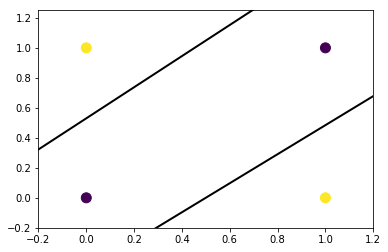

In [83]:
#plot out the decision line determined by learned weight and bias
import matplotlib.pyplot as plt
plot_x = np.array([np.min(x[:, 0] - 0.2), np.max(x[:, 1]+0.2)])
plot_y = 1 / W[1,0] * (-W[0,0] * plot_x - b[0])
plot_y2 = 1 / W[1,1] * (-W[0,1] * plot_x - b[1])
#plot_y2 = 1 / W2[1] * (-W2[0] * plot_x - b2)

plt.scatter(x[:, 0], x[:, 1], c=np.squeeze(y), s=100, cmap='viridis')
plt.plot(plot_x, plot_y, color='k', linewidth=2)
plt.plot(plot_x, plot_y2,color='k', linewidth=2)
plt.xlim([-0.2, 1.2]); plt.ylim([-0.2, 1.25]);
plt.show()

# Some interesting finds

When we have learning_rate=.1 we easily find the boundaries for the XOR when we do at least 10000 iterations to guarantee that we find the boundaries. Sometime when our learning_rate=.01 it finds the two boundaries and other times it doesn't. When we have our learning rate too big like learning_rate=5 we are able to see the cost function oscillate between cost values which makes sense because it means that our learning rate value is too big to find the local minimum value. 